In [40]:
# from google.colab import drive
# drive.mount("/content/drive")

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix, classification_report, accuracy_score,r2_score
from sklearn.cluster import KMeans

In [86]:
df = pd.read_csv("F:/personal/AW 5/docs/BA_AW5_TASKS/house builder.csv")

In [43]:
cols = df.columns.to_list()
cols

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [69]:
df["bedrooms"].value_counts()

3.000000    9824
4.000000    6882
2.000000    2760
5.000000    1601
6.000000     272
1.000000     199
6.029449      62
0.701607      13
Name: bedrooms, dtype: int64

In [82]:
df["bedrooms"] = clip_outliers((df["bedrooms"]),3)

In [79]:
df["bathrooms"] = clip_outliers((df["bathrooms"]),3)

In [80]:
df["bathrooms"].value_counts()

2.500000    5380
1.000000    3852
1.750000    3048
2.250000    2047
2.000000    1930
1.500000    1446
2.750000    1185
3.000000     753
3.500000     731
3.250000     589
4.425193     187
3.750000     155
4.000000     136
4.250000      79
0.750000      72
0.000000      10
1.250000       9
0.500000       4
Name: bathrooms, dtype: int64

In [87]:
import numpy as np

def clip_outliers(data, num_stds):
    mean = np.mean(data)
    std = np.std(data)
    lower_bound = mean - num_stds * std
    upper_bound = mean + num_stds * std
    data = np.clip(data, lower_bound, upper_bound)
    return data


In [88]:
df["bathrooms"] = clip_outliers((df["bathrooms"]),3)
df["bedrooms"] = clip_outliers((df["bedrooms"]),3)
df["sqft_living"] = clip_outliers((df["sqft_living"]),3)
df["sqft_lot"] = clip_outliers((df["sqft_lot"]),3)
df["floors"] = clip_outliers((df["floors"]),3)
df["waterfront"] = clip_outliers((df["waterfront"]),3)
df["view"] = clip_outliers((df["view"]),3)
df["condition"] = clip_outliers((df["condition"]),3)
df["grade"] = clip_outliers((df["grade"]),3)
df["sqft_above"] = clip_outliers((df["sqft_above"]),3)
df["sqft_basement"] = clip_outliers((df["sqft_basement"]),3)
df["yr_built"] = clip_outliers((df["yr_built"]),3)
df["yr_renovated"] = clip_outliers((df["yr_renovated"]),3)
df["zipcode"] = clip_outliers((df["zipcode"]),3)
df["lat"] = clip_outliers((df["lat"]),3)
df["long"] = clip_outliers((df["long"]),3)
df["sqft_living15"] = clip_outliers((df["sqft_living15"]),3)
df["sqft_lot15"] = clip_outliers((df["sqft_lot15"]),3)


{'whiskers': [<matplotlib.lines.Line2D at 0x241c56c9c90>,
 'caps': [<matplotlib.lines.Line2D at 0x241c56cafd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x241c56c9350>],
 'medians': [<matplotlib.lines.Line2D at 0x241c56cbe90>],
 'fliers': [<matplotlib.lines.Line2D at 0x241c6f322d0>],
 'means': []}

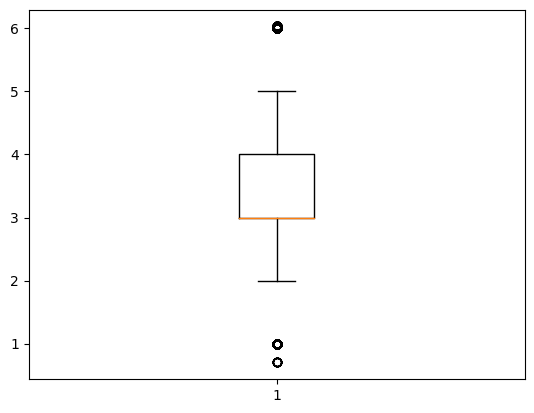

In [73]:
plt.boxplot(df["bedrooms"])

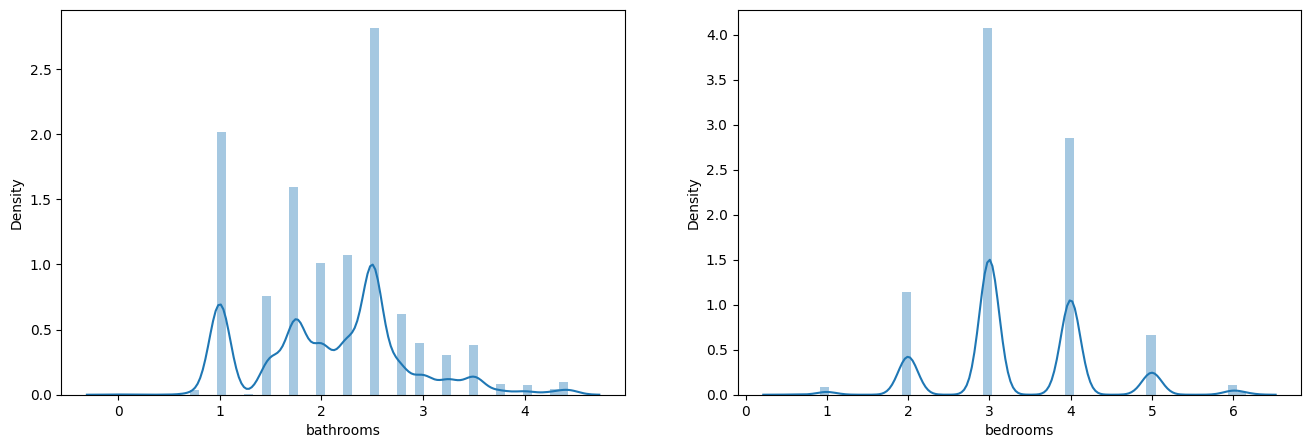

In [83]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.distplot(df["bathrooms"])
plt.subplot(1,2,2)
sns.distplot(df["bedrooms"])

plt.show()

<AxesSubplot: xlabel='floors', ylabel='Density'>

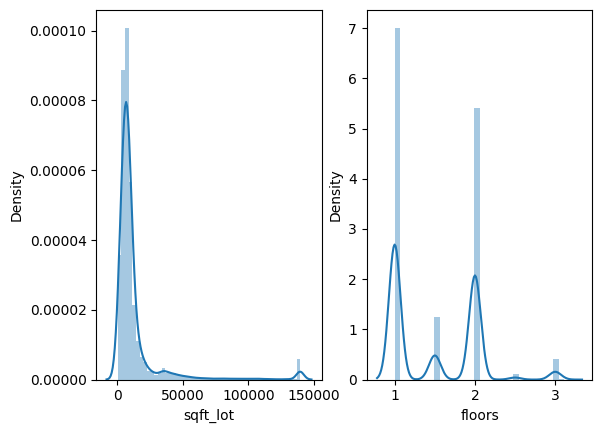

In [48]:
plt.subplot(1,2,1)
sns.distplot(df["sqft_lot"])
plt.subplot(1,2,2)
sns.distplot(df["floors"])

<AxesSubplot: xlabel='sqft_lot', ylabel='Density'>

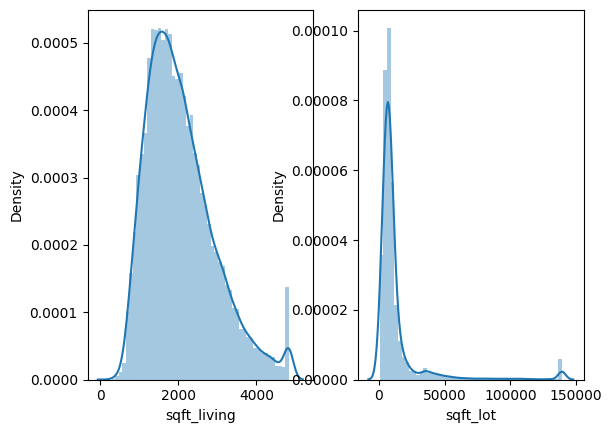

In [49]:
plt.subplot(1,2,1)
sns.distplot(df["sqft_living"])
plt.subplot(1,2,2)
sns.distplot(df["sqft_lot"])

<AxesSubplot: xlabel='floors', ylabel='Density'>

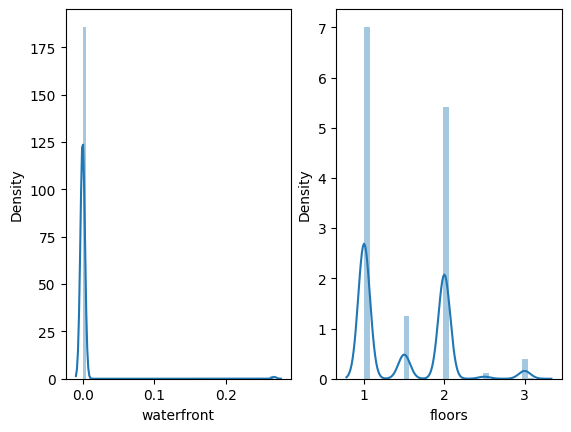

In [50]:
plt.subplot(1,2,1)
sns.distplot(df["waterfront"])
plt.subplot(1,2,2)
sns.distplot(df["floors"])

<AxesSubplot: xlabel='condition', ylabel='Density'>

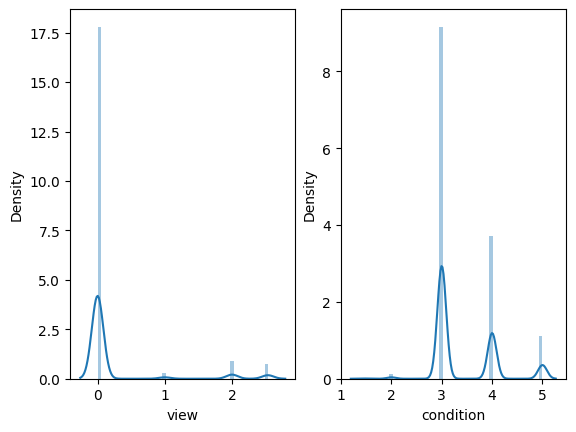

In [51]:
plt.subplot(1,2,1)
sns.distplot(df["view"])
plt.subplot(1,2,2)
sns.distplot(df["condition"])

<AxesSubplot: xlabel='sqft_above', ylabel='Density'>

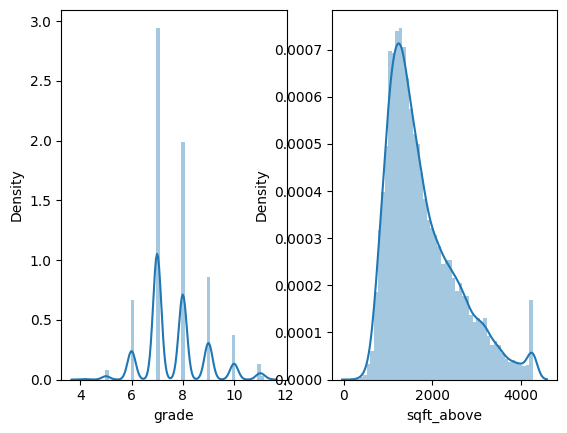

In [52]:
plt.subplot(1,2,1)
sns.distplot(df["grade"])
plt.subplot(1,2,2)
sns.distplot(df["sqft_above"])

<AxesSubplot: xlabel='yr_built', ylabel='Density'>

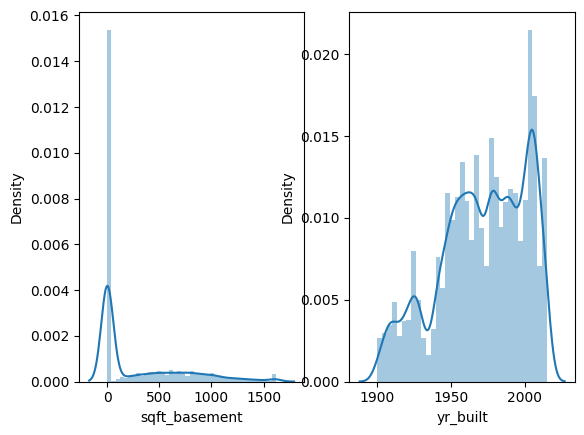

In [53]:
plt.subplot(1,2,1)
sns.distplot(df["sqft_basement"])
plt.subplot(1,2,2)
sns.distplot(df["yr_built"])

<AxesSubplot: xlabel='zipcode', ylabel='Density'>

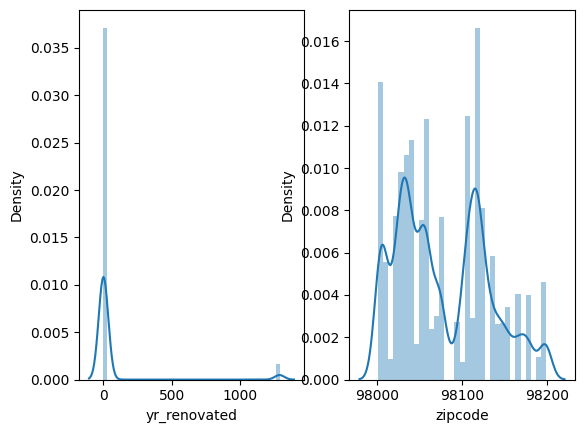

In [54]:
plt.subplot(1,2,1)
sns.distplot(df["yr_renovated"])
plt.subplot(1,2,2)
sns.distplot(df["zipcode"])

<AxesSubplot: xlabel='long', ylabel='Density'>

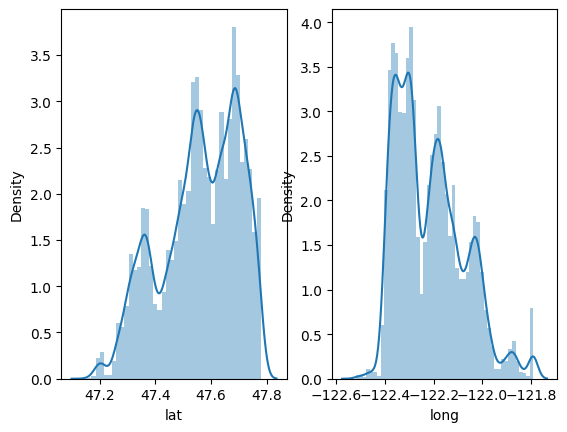

In [55]:
plt.subplot(1,2,1)
sns.distplot(df["lat"])
plt.subplot(1,2,2)
sns.distplot(df["long"])

<AxesSubplot: xlabel='sqft_lot15', ylabel='Density'>

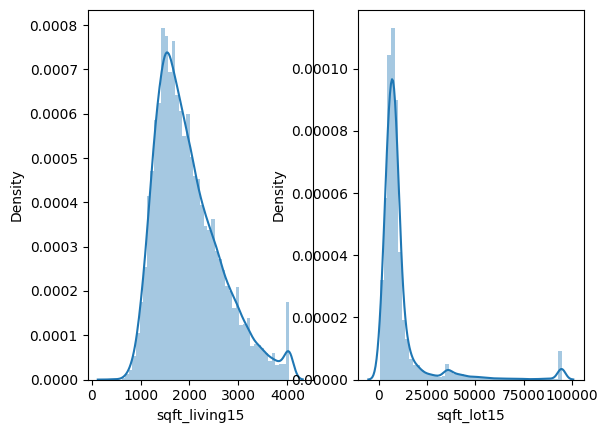

In [56]:
plt.subplot(1,2,1)
sns.distplot(df["sqft_living15"])
plt.subplot(1,2,2)
sns.distplot(df["sqft_lot15"])

In [55]:
f = list(df["sqft_living"].unique())
f1 = df["sqft_living"].value_counts()
print(f1)
f

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64


[1180,
 2570,
 770,
 1960,
 1680,
 5420,
 1715,
 1060,
 1780,
 1890,
 3560,
 1160,
 1430,
 1370,
 1810,
 2950,
 1600,
 1200,
 1250,
 1620,
 3050,
 2270,
 1070,
 2450,
 1710,
 1400,
 1520,
 2320,
 1190,
 2330,
 1090,
 2060,
 2300,
 1660,
 2360,
 1220,
 2620,
 4220,
 3595,
 1570,
 1280,
 3160,
 990,
 2290,
 2753,
 3150,
 1410,
 1980,
 2730,
 2830,
 2250,
 2420,
 3250,
 1850,
 2150,
 1260,
 2519,
 1540,
 2770,
 2720,
 2240,
 1000,
 3200,
 4770,
 2750,
 2380,
 1790,
 3430,
 1760,
 1040,
 3450,
 2350,
 1900,
 2020,
 960,
 2140,
 2660,
 1610,
 1030,
 3520,
 1580,
 3300,
 2070,
 2190,
 2920,
 1210,
 2340,
 1670,
 1240,
 3140,
 2030,
 2310,
 2080,
 3230,
 4380,
 1590,
 880,
 2400,
 1450,
 2100,
 2910,
 2160,
 2010,
 3950,
 1320,
 2590,
 1170,
 1110,
 2820,
 3670,
 2550,
 2260,
 1360,
 5180,
 700,
 3960,
 2640,
 1270,
 3400,
 1910,
 1340,
 2680,
 1560,
 3880,
 1120,
 1970,
 1950,
 1350,
 2440,
 1050,
 3130,
 4090,
 1490,
 1330,
 2230,
 1650,
 2180,
 1690,
 860,
 1940,
 1010,
 1300,
 910,
 2480,

In [56]:
df["bedrooms"] 

0        3
1        3
2        2
3        4
4        3
        ..
21608    3
21609    4
21610    2
21611    3
21612    2
Name: bedrooms, Length: 21613, dtype: int64

In [57]:
for i in cols:
  print(df[i].value_counts())
  # print(df[i].unique())

795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64
20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20141102T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00 

In [89]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df.isnull().sum()
df = df.drop(columns=['id','date'], axis = 1) 
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0       3.0       1.00       1180.0    5650.0     1.0   
1      538000.0       3.0       2.25       2570.0    7242.0     2.0   
2      180000.0       2.0       1.00        770.0   10000.0     1.0   
3      604000.0       4.0       3.00       1960.0    5000.0     1.0   
4      510000.0       3.0       2.00       1680.0    8080.0     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0       3.0       2.50       1530.0    1131.0     3.0   
21609  400000.0       4.0       2.50       2310.0    5813.0     2.0   
21610  402101.0       2.0       0.75       1020.0    1350.0     2.0   
21611  400000.0       3.0       2.50       1600.0    2388.0     2.0   
21612  325000.0       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0             0.0   0.0        3.0    7.0      1180.0            0.0   
1             0.0   0.0        3.0    7.0      2170.0          400.0   
2             0.0   0.0        3.0    6.0       770.0            0.0   
3             0.0   0.0        5.0    7.0      1050.0          910.0   
4             0.0   0.0        3.0    8.0      1680.0            0.0   
...           ...   ...        ...    ...         ...            ...   
21608         0.0   0.0        3.0    8.0      1530.0            0.0   
21609         0.0   0.0        3.0    8.0      2310.0            0.0   
21610         0.0   0.0        3.0    7.0      1020.0            0.0   
21611         0.0   0.0        3.0    8.0      1600.0            0.0   
21612         0.0   0.0        3.0    7.0      1020.0            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955        0.0000    98178  47.5112 -122.257         1340.0   
1          1951     1289.4121    98125  47.7210 -122.319         1690.0   
2          1933        0.0000    98028  47.7379 -122.233         2720.0   
3          1965        0.0000    98136  47.5208 -122.393         1360.0   
4          1987        0.0000    98074  47.6168 -122.045         1800.0   
...         ...           ...      ...      ...      ...            ...   
21608      2009        0.0000    98103  47.6993 -122.346         1530.0   
21609      2014        0.0000    98146  47.5107 -122.362         1830.0   
21610      2009        0.0000    98144  47.5944 -122.299         1020.0   
21611      2004        0.0000    98027  47.5345 -122.069         1410.0   
21612      2008        0.0000    98144  47.5941 -122.299         1020.0   

       sqft_lot15  year  
0          5650.0  2014  
1          7639.0  2014  
2          8062.0  2015  
3          5000.0  2014  
4          7503.0  2015  
...           ...   ...  
21608      1509.0  2014  
21609      7200.0  2015  
21610      2007.0  2014  
21611      1287.0  2015  
21612      1357.0  2014  

[21613 rows x 20 columns]

In [90]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition        float64
grade            float64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
year               int64
dtype: object

In [8]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15          year  
count  21613.000000  21613.000000   21613.000000   21613.000000  21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652   2014.322954  
std        0.138564      0.140828     685.391304   27304.179631      0.467616  
min       47.155900   -122.519000     399.000000     651.000000   2014.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000   2014.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000   2014.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000   2015.000000  
max       47.777600   -121.315000    6210.000000  871200.000000   2015.000000

In [61]:
corr = df.corr()
corr

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739     0.055363  0.007644  0.006338   
zipcode       -0.053203 -0.152668  -0.203866    -0.199430 -0.129574 -0.059121   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   
year           0.003576 -0.009838  -0.026596    -0.029038  0.005468 -0.022315   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
zipcode          0.030285  0.084827   0.003026 -0.184862   -0.261190   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   
year            -0.004165  0.001364  -0.045589 -0.030387   -0.023823   

               sqft_basement  yr_built  yr_renovated   zipcode       lat  \
price               0.323816  0.054012      0.126434 -0.053203  0.307003   
bedrooms            0.303093  0.154178      0.018841 -0.152668 -0.008931   
bathrooms           0.283770  0.506019      0.050739 -0.203866  0.024573   
sqft_living         0.435043  0.318049      0.055363 -0.199430  0.052529   
sqft_lot            0.015286  0.053080      0.007644 -0.129574 -0.085683   
floors             -0.245705  0.489319      0.006338 -0.059121  0.049614   
waterfront          0.080588 -0.026161      0.092885  0.030285 -0.014274   
view                0.276947 -0.053440      0.103917  0.084827  0.006157   
condition           0.174105 -0.361417     -0.060618  0.003026 -0.014941   
grade               0.168392  0.446963     

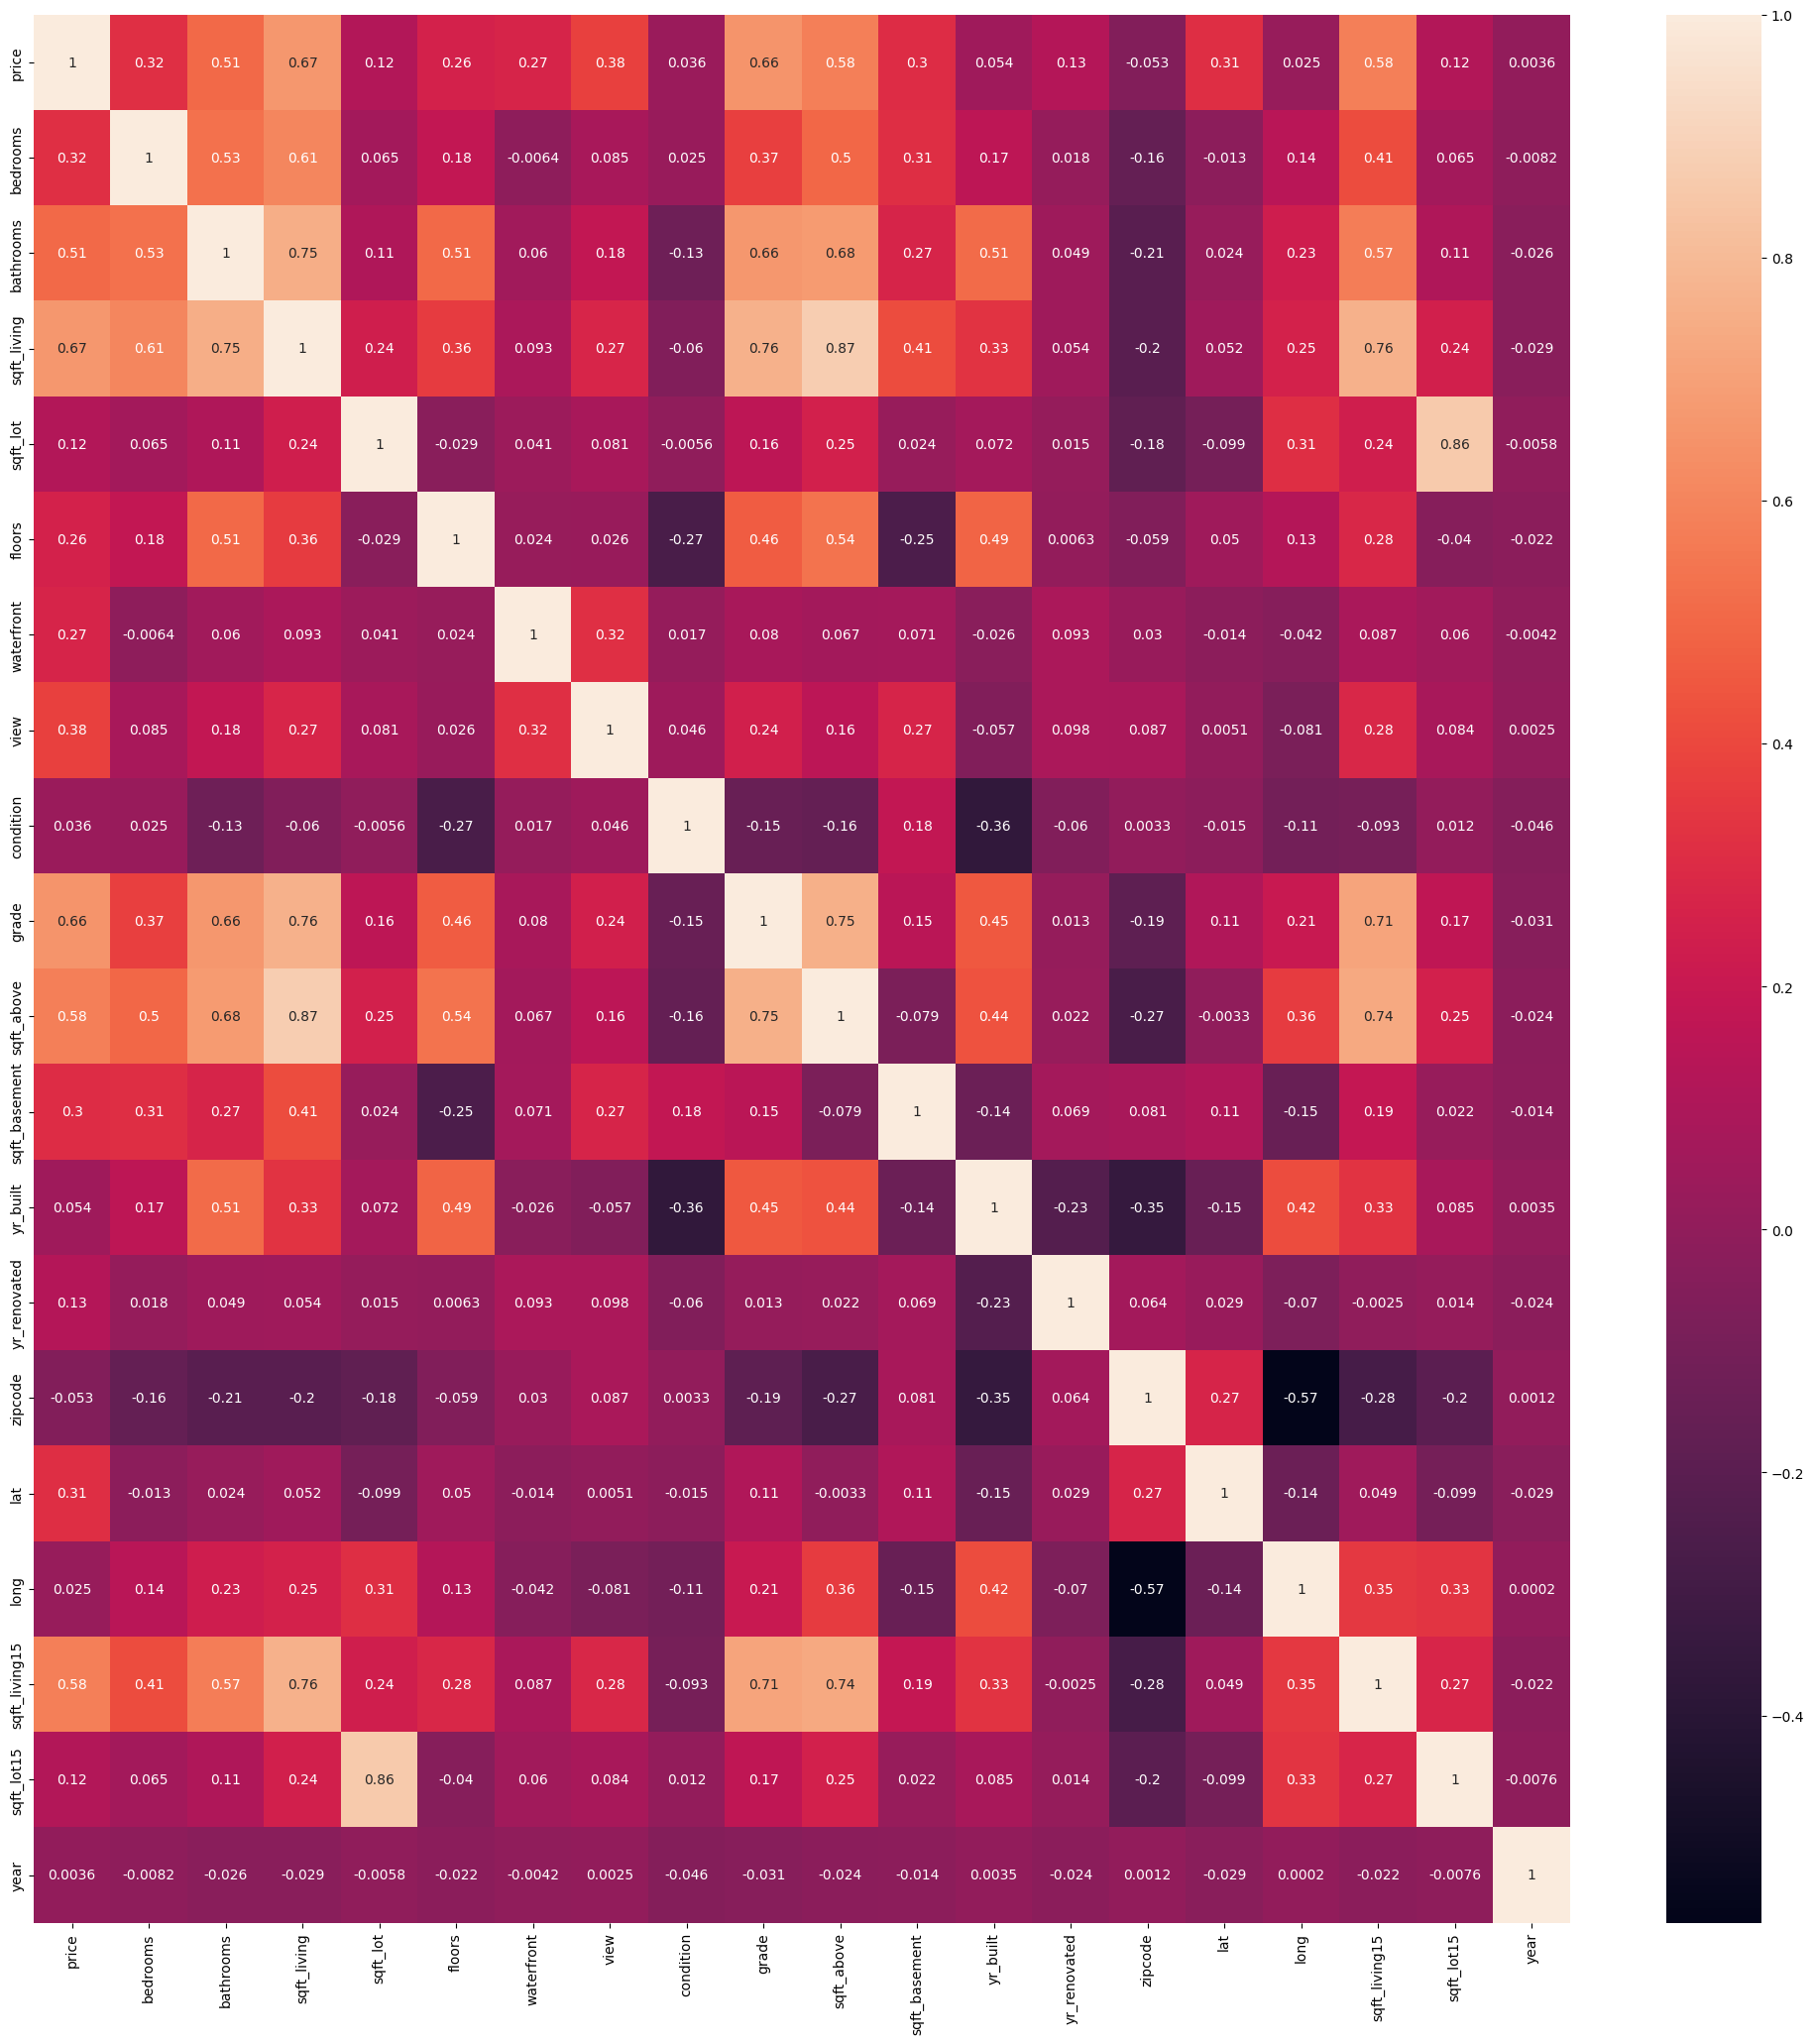

In [91]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

In [94]:
df = df.drop(columns = ["sqft_living15", "sqft_lot15","grade","sqft_above"], axis = 1)

KeyError: "['sqft_living15', 'sqft_lot15', 'grade', 'sqft_above'] not found in axis"

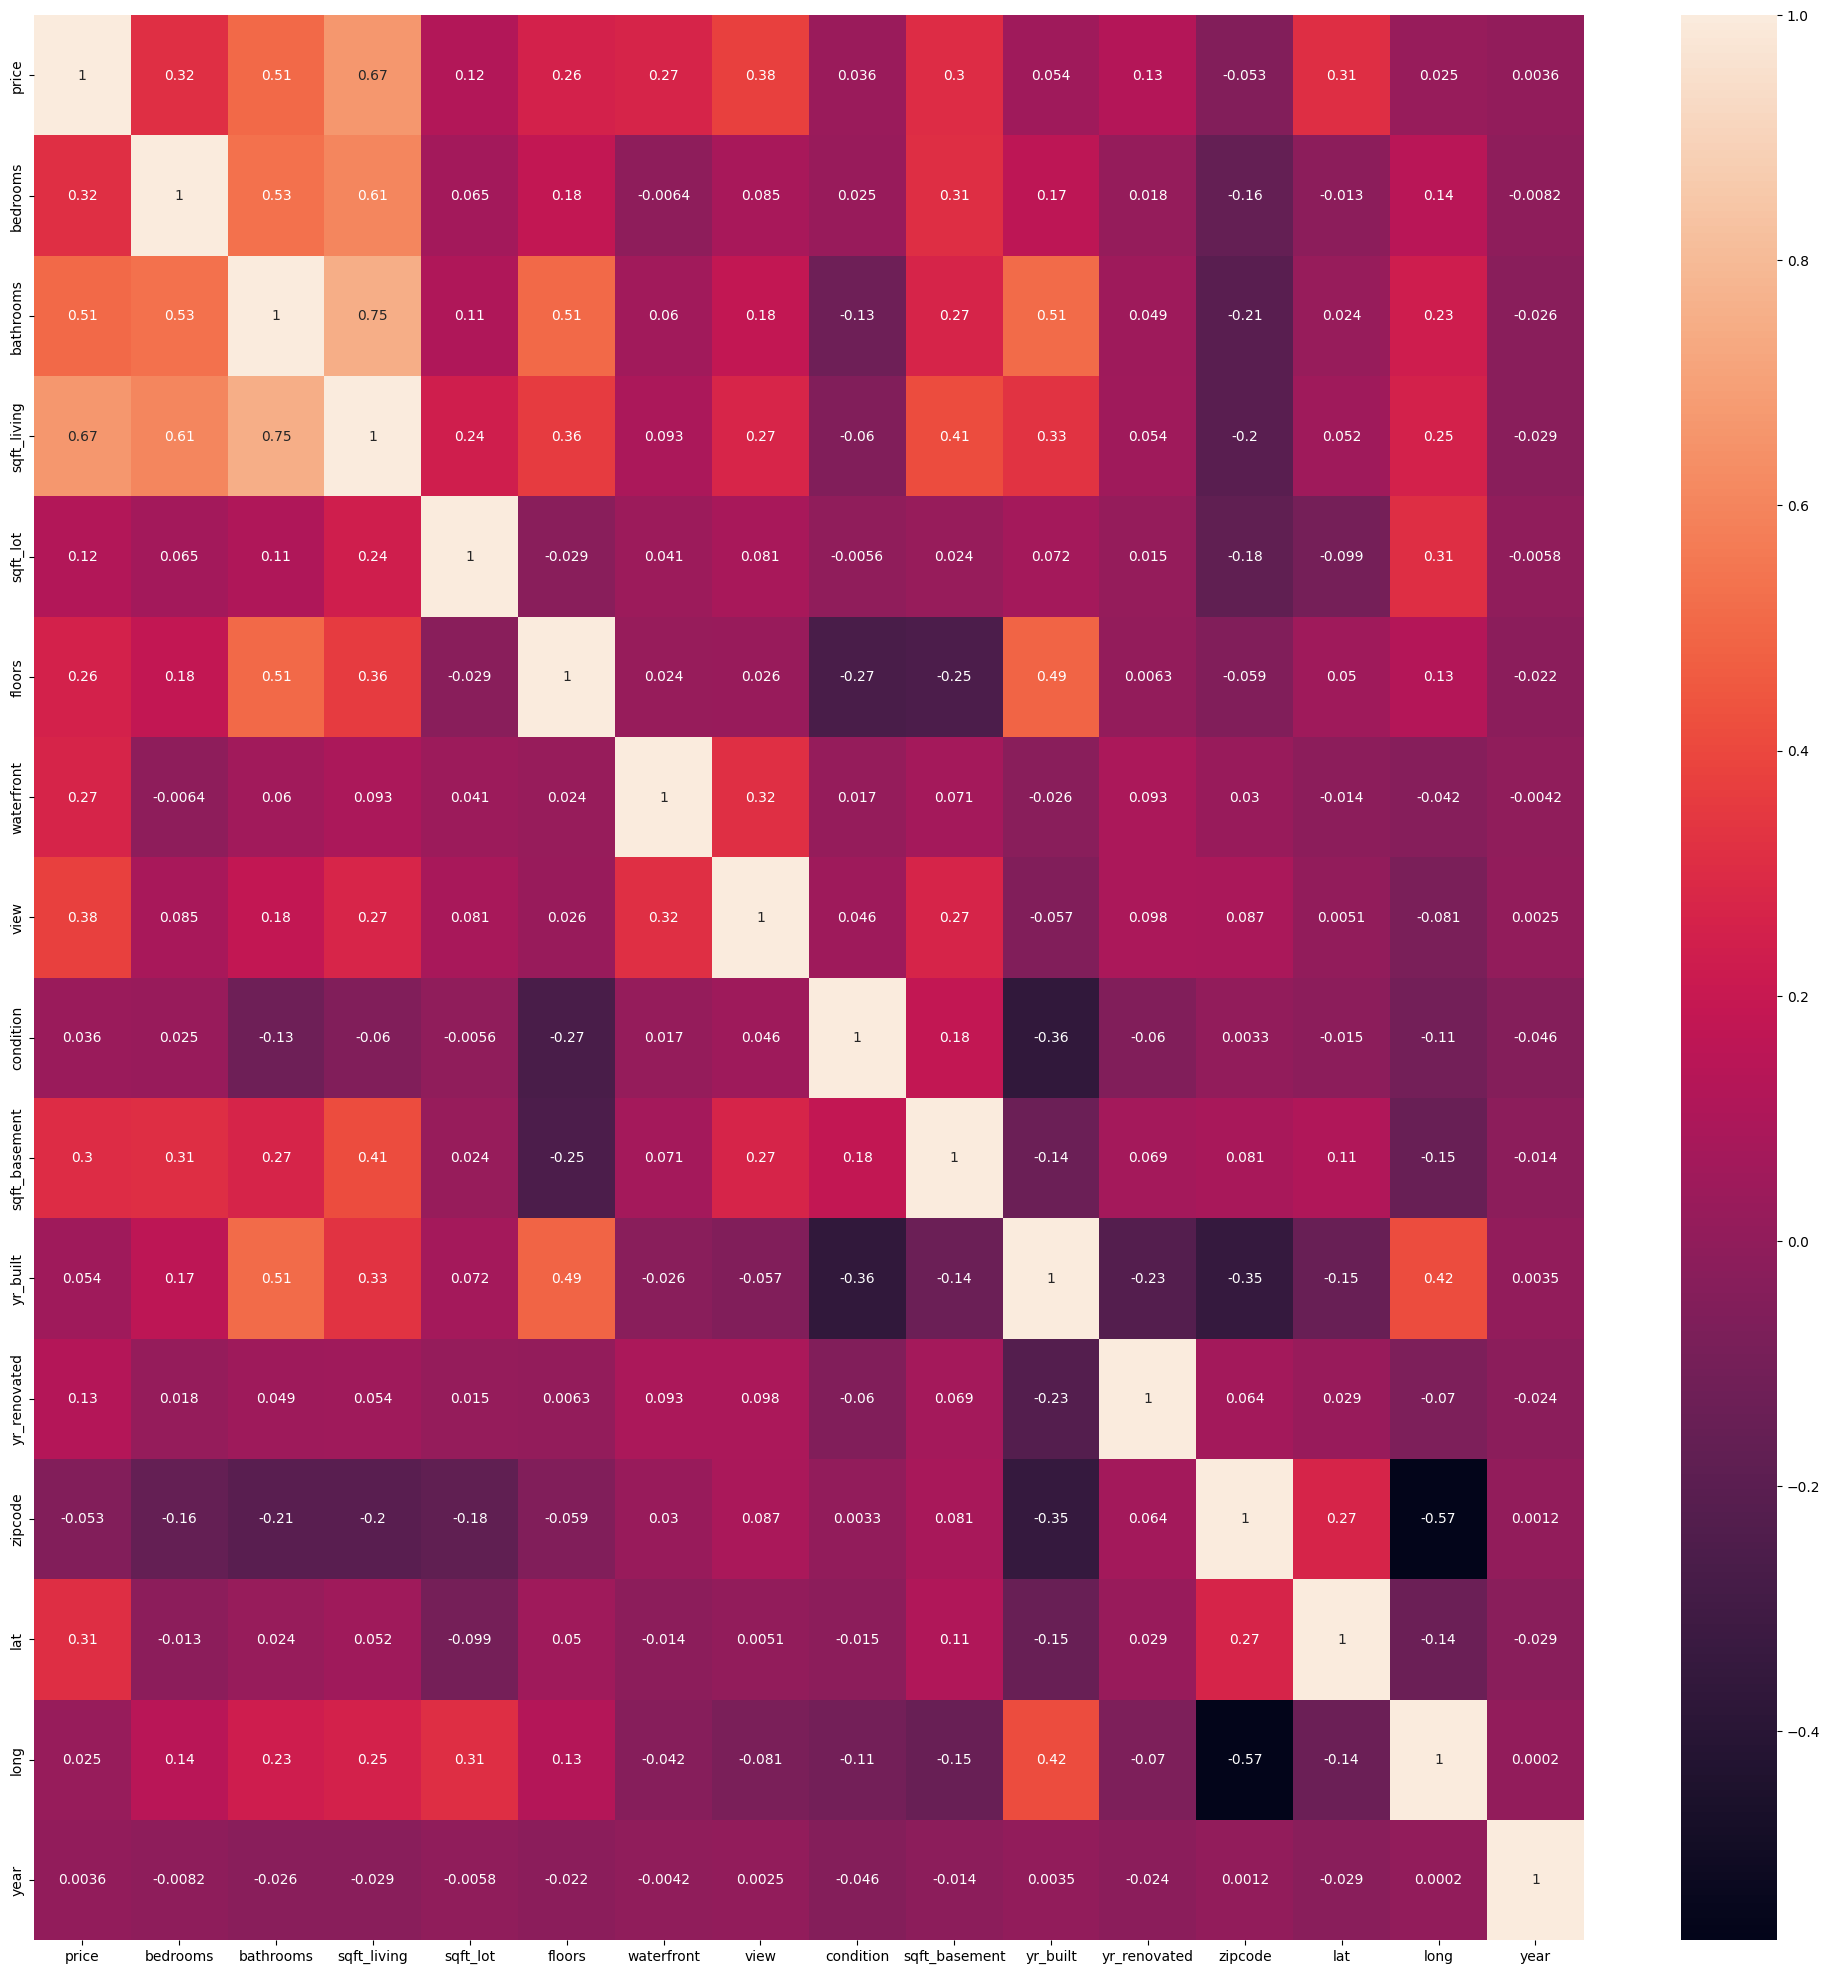

In [93]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, annot=True, ax=ax)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x241bce51190>,
 'caps': [<matplotlib.lines.Line2D at 0x241bce52a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x241bd7c0d50>],
 'medians': [<matplotlib.lines.Line2D at 0x241bb8f5250>],
 'fliers': [<matplotlib.lines.Line2D at 0x241bce5ed50>],
 'means': []}

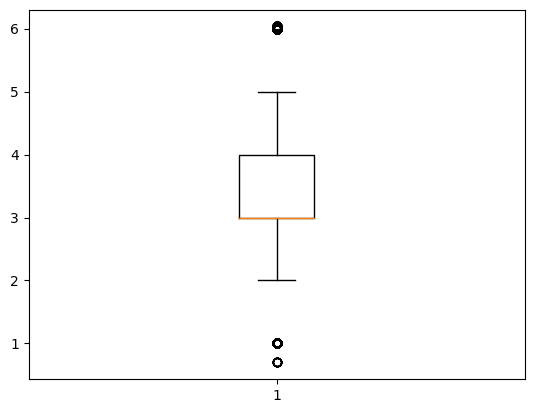

In [13]:
plt.boxplot(df["bedrooms"])

{'whiskers': [<matplotlib.lines.Line2D at 0x241bd178950>,
 'caps': [<matplotlib.lines.Line2D at 0x241bd17a110>,
 'boxes': [<matplotlib.lines.Line2D at 0x241bd16fd90>],
 'medians': [<matplotlib.lines.Line2D at 0x241bd17b690>],
 'fliers': [<matplotlib.lines.Line2D at 0x241bbcacbd0>],
 'means': []}

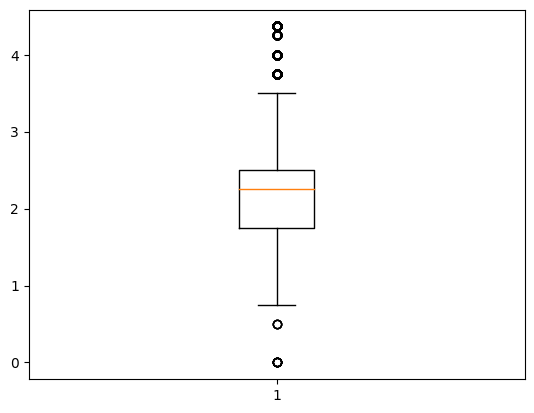

In [18]:
plt.boxplot(df["bathrooms"])

{'whiskers': [<matplotlib.lines.Line2D at 0x241bcf92450>,
 'caps': [<matplotlib.lines.Line2D at 0x241bcf93710>,
 'boxes': [<matplotlib.lines.Line2D at 0x241bcf91750>],
 'medians': [<matplotlib.lines.Line2D at 0x241bcf9cc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x241bd1a6c90>],
 'means': []}

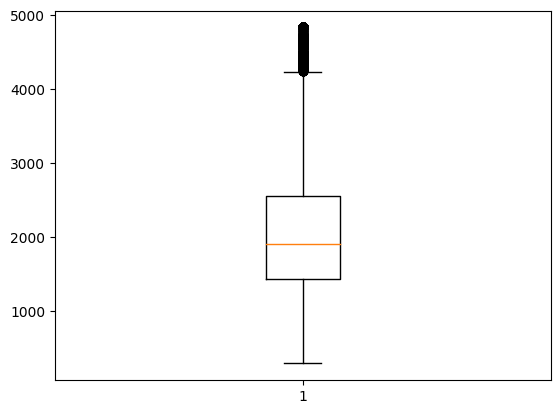

In [19]:
plt.boxplot(df["sqft_living"])

In [95]:
X = df.iloc[:,1:20]
X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0           3.0       1.00       1180.0    5650.0     1.0         0.0   0.0   
1           3.0       2.25       2570.0    7242.0     2.0         0.0   0.0   
2           2.0       1.00        770.0   10000.0     1.0         0.0   0.0   
3           4.0       3.00       1960.0    5000.0     1.0         0.0   0.0   
4           3.0       2.00       1680.0    8080.0     1.0         0.0   0.0   
...         ...        ...          ...       ...     ...         ...   ...   
21608       3.0       2.50       1530.0    1131.0     3.0         0.0   0.0   
21609       4.0       2.50       2310.0    5813.0     2.0         0.0   0.0   
21610       2.0       0.75       1020.0    1350.0     2.0         0.0   0.0   
21611       3.0       2.50       1600.0    2388.0     2.0         0.0   0.0   
21612       2.0       0.75       1020.0    1076.0     2.0         0.0   0.0   

       condition  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            3.0            0.0      1955        0.0000    98178  47.5112   
1            3.0          400.0      1951     1289.4121    98125  47.7210   
2            3.0            0.0      1933        0.0000    98028  47.7379   
3            5.0          910.0      1965        0.0000    98136  47.5208   
4            3.0            0.0      1987        0.0000    98074  47.6168   
...          ...            ...       ...           ...      ...      ...   
21608        3.0            0.0      2009        0.0000    98103  47.6993   
21609        3.0            0.0      2014        0.0000    98146  47.5107   
21610        3.0            0.0      2009        0.0000    98144  47.5944   
21611        3.0            0.0      2004        0.0000    98027  47.5345   
21612        3.0            0.0      2008        0.0000    98144  47.5941   

          long  year  
0     -122.257  2014  
1     -122.319  2014  
2     -122.233  2015  
3     -122.393  2014  
4     -122.045  2015  
...        ...   ...  
21608 -122.346  2014  
21609 -122.362  2015  
21610 -122.299  2014  
21611 -122.069  2015  
21612 -122.299  2014  

[21613 rows x 15 columns]

In [96]:
y = df.iloc[:,:1].values
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7 , test_size = 0.20)
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-0.41473112,  0.51416026,  0.46699133, ..., -0.48211648,
         0.48196924, -0.68728925],
       [-0.41473112,  0.51416026, -0.01565166, ...,  0.02192942,
         0.55408448,  1.45499147],
       [ 0.71065705,  0.51416026,  0.83471933, ..., -1.47646816,
         1.52764021, -0.68728925],
       ...,
       [-0.41473112, -0.14911686,  0.31760184, ...,  0.5737042 ,
        -0.69350916, -0.68728925],
       [ 0.71065705,  0.51416026,  0.78875333, ...,  0.17957936,
         1.10937182, -0.68728925],
       [-1.5401193 , -1.4756711 , -1.11883564, ...,  1.18477851,
        -0.80889354,  1.45499147]])

In [98]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [102]:
# generate random data for independent and dependent variables
# np.random.seed(0)
# x = np.random.rand(100, 1)
# y = 2 + 3 * x + np.random.rand(100, 1)

# # fit the linear regression model
# model = LinearRegression()
# model.fit(x, y)

# make predictions using the model
y_pred = linear_regressor.predict(X_test)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate root mean squared error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 52100696160.85605
Root Mean Squared Error: 228255.76917321509
Mean Absolute Error: 137389.74951886368
R-squared: 0.6057920714966959


In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)


MSE: 52100696160.85605
MAE: 137389.74951886368


In [115]:
result_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
result_df

y_pred    y_test
0      447000.0  462000.0
1      698000.0  768000.0
2     1028950.0  920000.0
3      261000.0  263000.0
4      505000.0  427500.0
...         ...       ...
4318   464950.0  377000.0
4319   430000.0  358000.0
4320  1000000.0  748000.0
4321   280000.0  310000.0
4322   630100.0  527950.0

[4323 rows x 2 columns]

In [104]:
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state = 0)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [112]:
y_test = y_test.ravel()

In [113]:
y_pred

array([ 447000.,  698000., 1028950., ..., 1000000.,  280000.,  630100.])

In [106]:
y_pred = treereg.predict(X_test)


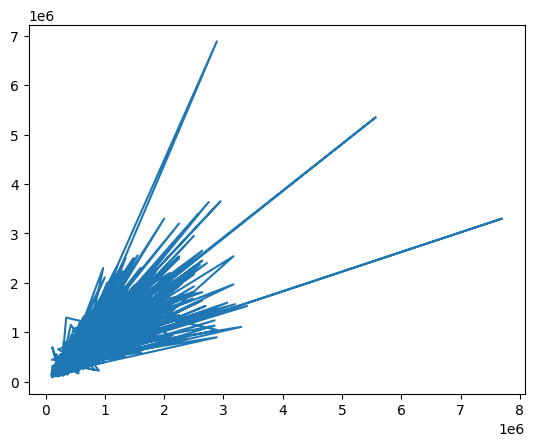

In [18]:
plt.plot(y_pred, y_test)

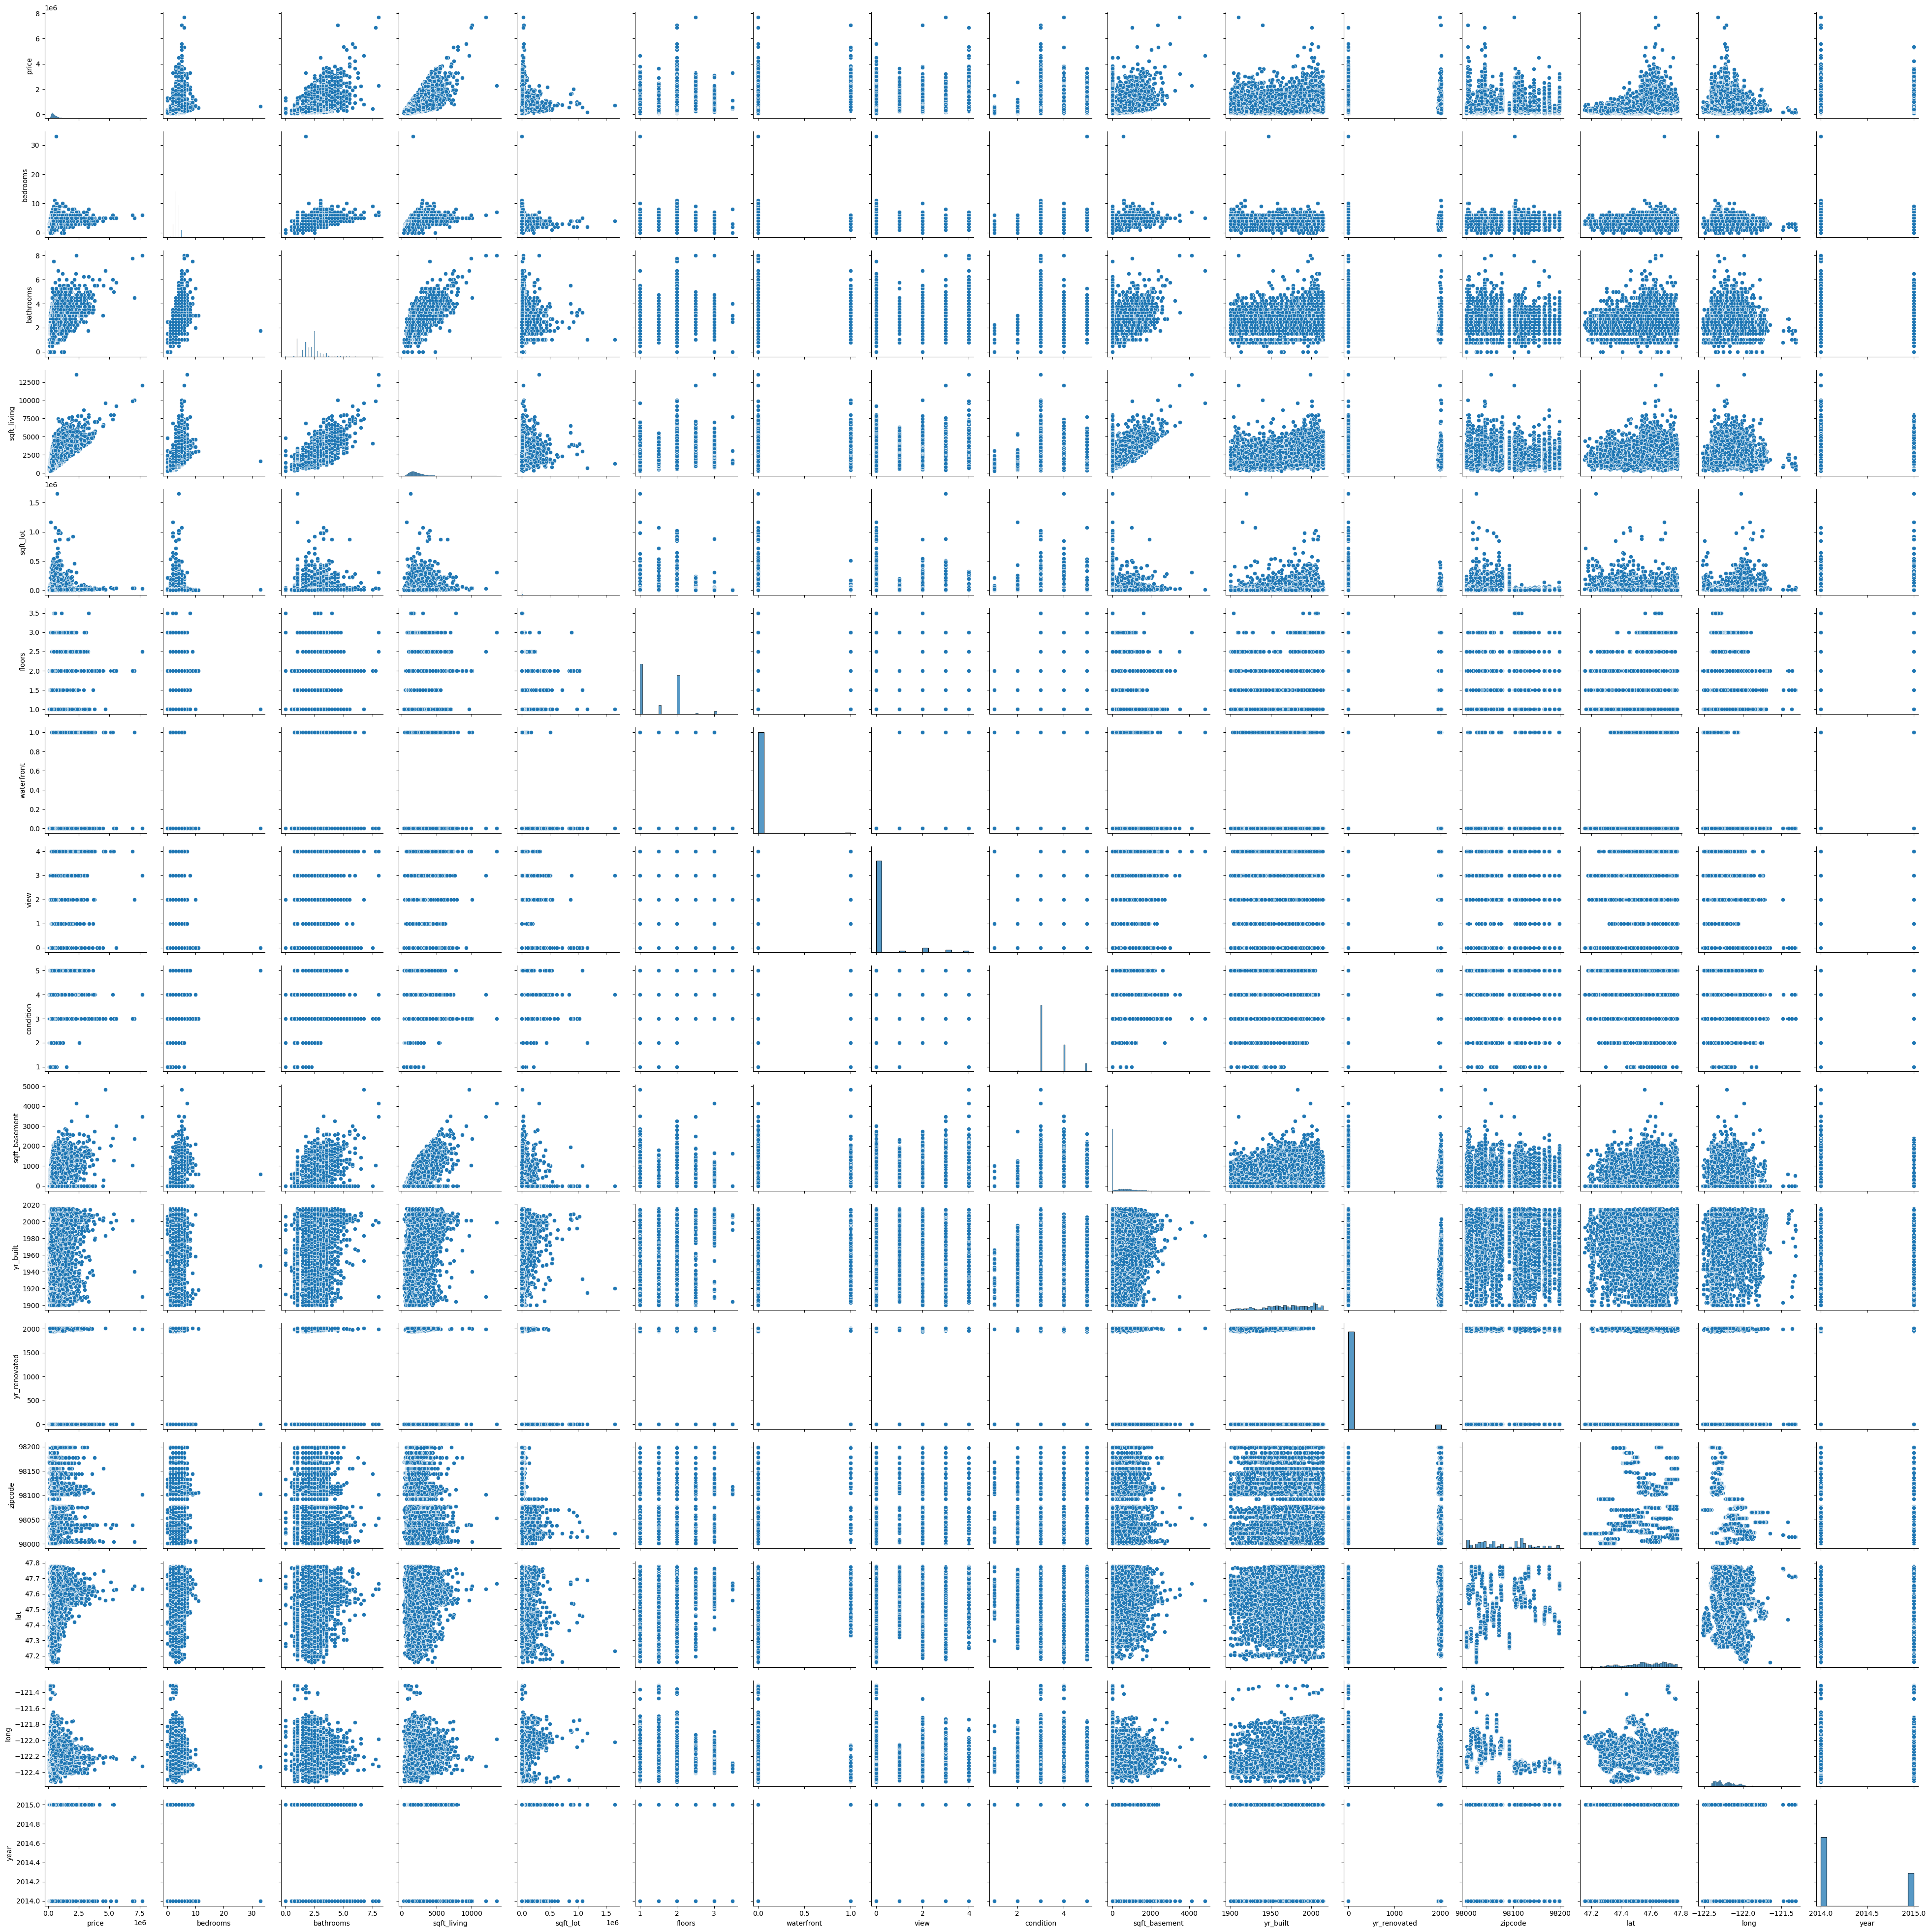

In [73]:
sns.pairplot(data = df)

In [107]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = treereg.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
# acc = roc_auc_score(y_test, y_pred)
# print("Test set auc: {:.2f}".format(acc))
# plot_roc_curve(treereg, X_test, y_test)


Test set accuracy: 0.01
